In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

pd.set_option('display.float_format', lambda num:'%1.3f'%num)
pd.set_option('display.max_columns', 99)
filterwarnings('ignore')

# Data Description

Feature | Description
:---|:---
UniqueId |The unique id of a customer.
SocialMedia |The number of different social media webpages visited during the session.
SocialMediaTime |The seconds spent visiting social media web pages.
News|The number of different news( eg. CNN) webpages visited by the prospective customer during the session.
NewsTime|The seconds spent visiting web pages providing news service. 
Blogs|The number Blog web pages visited during the session.
BlogsTime| The seconds spent visiting Blogs web pages.
BounceRate| The percentage of visitors  leaving the page without triggering any other requests during the session.
ExitRate| The value of all pageviews to the page, the percentage that was the last in the session. 
PageValue|The average value for a web page that a user visited before completing an e-commerce transaction
TrafficKind| Web Administration terminology. Categorical feature describing the kind of traffic the website received. 
OS|Categorical feature describing the operating system of the platform connected to the session.
Browser|Categorical feature describing the browser that connected to the session.
Month|It can be handled as discrete or categorical. The month of the connection.
Region|Categorical geographical feature describing the USA region from where the session is initiated.
VisitorKind|This categorical variable describes the kind of visitor.
DayImportance|The closeness of the visit time to a special day (e.g. Mother’s Day, Valentine's Day) 
IsWeekend|Whether it is a weekend or not.
IsSale|Whether this is a transaction or not. This is the Response Variable.

# Data Wrangling & Visualization 




In [3]:
train = pd.read_csv("train.csv", index_col=0)

In [4]:
train.head()

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,TrafficKind,OS,Browser,Month,Region,VisitorKind,DayImportance,IsWeekend,IsSale
UniqueId,,,,,,,,,,,,,,,,,,
000x41,3.000,87.833,0.000,0.000,27.000,798.333,0.000,0.013,22.916,search,windows,Google-Chrome,Feb,East North Central,Returning,0.800,0.000,True
000x4c,10.000,1005.667,0.000,0.000,36.000,2111.342,0.004,0.014,11.439,direct,windows,Other,Feb,New England,Returning,0.000,0.000,True
000x65,4.000,61.000,0.000,0.000,19.000,607.000,0.000,0.027,17.536,referral,android,Safari,Feb,West South Central,Returning,1.000,1.000,True
000xc6,0.000,0.000,0.000,0.000,17.000,840.233,0.000,0.002,109.176,direct,windows,Google-Chrome,Mar,Pacific,New,0.000,0.000,True
000xc7,3.000,94.000,2.000,125.000,55.000,1970.845,0.000,0.002,96.255,direct,windows,Firefox,Mar,New England,New,0.000,1.000,True


In [5]:
#Explore columns
train.columns

Index(['SocialMedia', 'SocialMediaTime', 'News', 'NewsTime', 'Blogs',
       'BlogsTime', 'BounceRate', 'ExitRate', 'PageValue', 'TrafficKind', 'OS',
       'Browser', 'Month', 'Region', 'VisitorKind', 'DayImportance',
       'IsWeekend', 'IsSale'],
      dtype='object')

In [6]:
#Description
train.describe()

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,DayImportance,IsWeekend
count,2900.000,2889.000,2892.000,2898.000,2893.000,2901.000,2891.000,2892.000,2891.000,2893.000,2896.000
mean,2.694,94.281,0.607,41.423,37.617,69062.541,0.016,0.034,14.110,0.045,0.261
std,3.566,184.294,1.326,144.907,50.334,2628346.866,0.039,0.041,27.794,0.173,0.439
min,-20.000,0.000,0.000,-1001.000,0.000,-2000056.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,10.000,284.700,0.000,0.012,0.000,0.000,0.000
50%,1.000,27.000,0.000,0.000,22.000,794.993,0.001,0.021,0.000,0.000,0.000
75%,4.000,115.000,1.000,0.000,44.000,1758.250,0.012,0.038,17.829,0.000,1.000
max,27.000,2720.500,12.000,1767.667,584.000,100099000.000,0.200,0.200,360.953,1.000,1.000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2908 entries, 000x41 to 0x1d70
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SocialMedia      2900 non-null   float64
 1   SocialMediaTime  2889 non-null   float64
 2   News             2892 non-null   float64
 3   NewsTime         2898 non-null   float64
 4   Blogs            2893 non-null   float64
 5   BlogsTime        2901 non-null   float64
 6   BounceRate       2891 non-null   float64
 7   ExitRate         2892 non-null   float64
 8   PageValue        2891 non-null   float64
 9   TrafficKind      2889 non-null   object 
 10  OS               2896 non-null   object 
 11  Browser          2891 non-null   object 
 12  Month            2898 non-null   object 
 13  Region           2894 non-null   object 
 14  VisitorKind      2893 non-null   object 
 15  DayImportance    2893 non-null   float64
 16  IsWeekend        2896 non-null   float64
 17  IsSale      

In [8]:
df=train.drop_duplicates() #drop duplicates

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2902 entries, 000x41 to 0x1d70
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SocialMedia      2894 non-null   float64
 1   SocialMediaTime  2883 non-null   float64
 2   News             2886 non-null   float64
 3   NewsTime         2892 non-null   float64
 4   Blogs            2887 non-null   float64
 5   BlogsTime        2895 non-null   float64
 6   BounceRate       2885 non-null   float64
 7   ExitRate         2886 non-null   float64
 8   PageValue        2885 non-null   float64
 9   TrafficKind      2883 non-null   object 
 10  OS               2890 non-null   object 
 11  Browser          2885 non-null   object 
 12  Month            2892 non-null   object 
 13  Region           2888 non-null   object 
 14  VisitorKind      2887 non-null   object 
 15  DayImportance    2887 non-null   float64
 16  IsWeekend        2890 non-null   float64
 17  IsSale      

In [10]:
df.isnull().sum() #check missing value

SocialMedia         8
SocialMediaTime    19
News               16
NewsTime           10
Blogs              15
BlogsTime           7
BounceRate         17
ExitRate           16
PageValue          17
TrafficKind        19
OS                 12
Browser            17
Month              10
Region             14
VisitorKind        15
DayImportance      15
IsWeekend          12
IsSale              0
dtype: int64

In [11]:
df2 = pd.read_csv('test.csv')

In [12]:
#Imputing Missing Values with Mode or Mean
df['SocialMedia'] = df ['SocialMedia'].fillna(df['SocialMedia'].mean())
df['SocialMediaTime'] = df ['SocialMediaTime'].fillna(df['SocialMediaTime'].mean())
df['News'] = df ['News'].fillna(df['News'].mean())
df['NewsTime'] = df ['NewsTime'].fillna(df['NewsTime'].mean())
df['Blogs'] = df ['Blogs'].fillna(df['Blogs'].mean())
df['BlogsTime'] = df ['BlogsTime'].fillna(df['BlogsTime'].mean())
df['BounceRate'] = df ['BounceRate'].fillna(df['BounceRate'].mean())
df['ExitRate'] = df ['ExitRate'].fillna(df['ExitRate'].mean())
df['PageValue'] = df ['PageValue'].fillna(df['PageValue'].mean())
df['TrafficKind'] = df ['TrafficKind'].fillna(df['TrafficKind'].mode())
df['OS'] = df ['OS'].fillna(df['OS'].mode())
df['Browser'] = df ['Browser'].fillna(df['Browser'].mode())
df['Month'] = df ['Month'].fillna(df['Month'].mode())
df['Region'] = df ['Region'].fillna(df['Region'].mode())
df['VisitorKind'] = df ['VisitorKind'].fillna(df['VisitorKind'].mode())
df['DayImportance'] = df ['DayImportance'].fillna(df['DayImportance'].mean())
df['IsWeekend'] = df ['IsWeekend'].fillna(df['IsWeekend'].mean())


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2902 entries, 000x41 to 0x1d70
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SocialMedia      2902 non-null   float64
 1   SocialMediaTime  2902 non-null   float64
 2   News             2902 non-null   float64
 3   NewsTime         2902 non-null   float64
 4   Blogs            2902 non-null   float64
 5   BlogsTime        2902 non-null   float64
 6   BounceRate       2902 non-null   float64
 7   ExitRate         2902 non-null   float64
 8   PageValue        2902 non-null   float64
 9   TrafficKind      2883 non-null   object 
 10  OS               2890 non-null   object 
 11  Browser          2885 non-null   object 
 12  Month            2892 non-null   object 
 13  Region           2888 non-null   object 
 14  VisitorKind      2887 non-null   object 
 15  DayImportance    2902 non-null   float64
 16  IsWeekend        2902 non-null   float64
 17  IsSale      

In [14]:
#Imputing Missing Values with Mode or Mean
df2['SocialMedia'] = df2 ['SocialMedia'].fillna(df2['SocialMedia'].mean())
df2['SocialMediaTime'] = df2 ['SocialMediaTime'].fillna(df2['SocialMediaTime'].mean())
df2['News'] = df2 ['News'].fillna(df2['News'].mean())
df2['NewsTime'] = df2 ['NewsTime'].fillna(df2['NewsTime'].mean())
df2['Blogs'] = df2 ['Blogs'].fillna(df2['Blogs'].mean())
df2['BlogsTime'] = df2 ['BlogsTime'].fillna(df2['BlogsTime'].mean())
df2['BounceRate'] = df2 ['BounceRate'].fillna(df2['BounceRate'].mean())
df2['ExitRate'] = df2 ['ExitRate'].fillna(df2['ExitRate'].mean())
df2['PageValue'] = df2 ['PageValue'].fillna(df2['PageValue'].mean())
df2['TrafficKind'] = df2 ['TrafficKind'].fillna(df2['TrafficKind'].mode())
df2['DayImportance'] = df2 ['DayImportance'].fillna(df2['DayImportance'].mean())
df2['IsWeekend'] = df2 ['IsWeekend'].fillna(df2['IsWeekend'].mean())
df2['OS'] = df2 ['OS'].fillna(df2['OS'].mode())
df2['Browser'] = df2 ['Browser'].fillna(df2['Browser'].mode())
df2['Month'] = df2 ['Month'].fillna(df2['Month'].mode())
df2['Region'] = df2 ['Region'].fillna(df2['Region'].mode())
df2['VisitorKind'] = df2 ['VisitorKind'].fillna(df2['VisitorKind'].mode())

In [15]:
df2['OS'] = df2 ['OS'].fillna(df2['OS'].mode())
df2['Browser'] = df2 ['Browser'].fillna(df2['Browser'].mode())
df2['Month'] = df2 ['Month'].fillna(df2['Month'].mode())
df2['Region'] = df2 ['Region'].fillna(df2['Region'].mode())
df2['VisitorKind'] = df2 ['VisitorKind'].fillna(df2['VisitorKind'].mode())

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueId         1000 non-null   object 
 1   SocialMedia      1000 non-null   float64
 2   SocialMediaTime  1000 non-null   float64
 3   News             1000 non-null   float64
 4   NewsTime         1000 non-null   float64
 5   Blogs            1000 non-null   float64
 6   BlogsTime        1000 non-null   float64
 7   BounceRate       1000 non-null   float64
 8   ExitRate         1000 non-null   float64
 9   PageValue        1000 non-null   float64
 10  TrafficKind      994 non-null    object 
 11  OS               994 non-null    object 
 12  Browser          996 non-null    object 
 13  Month            995 non-null    object 
 14  Region           994 non-null    object 
 15  VisitorKind      996 non-null    object 
 16  DayImportance    1000 non-null   float64
 17  IsWeekend      

In [17]:
features = list(df.columns)
features.remove('IsSale')

In [18]:
encoded_df = pd.get_dummies(df[features])
encoded_df2 = pd.get_dummies(df2[features])

In [19]:
test_data = encoded_df2

In [20]:
X = encoded_df
y = df['IsSale']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y , test_size = 0.2, random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf =RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [24]:
y_predict = rf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print ('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_predict)))

Model accuracy score : 0.8503




**The management wants to know what are the most important features for the model.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [27]:
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

PageValue                   0.332
ExitRate                    0.094
BlogsTime                   0.090
Blogs                       0.066
BounceRate                  0.052
SocialMediaTime             0.051
SocialMedia                 0.037
NewsTime                    0.027
Month_Nov                   0.022
News                        0.021
TrafficKind_search          0.012
IsWeekend                   0.011
TrafficKind_direct          0.010
Month_May                   0.010
Region_New England          0.010
VisitorKind_Returning       0.009
OS_windows                  0.009
VisitorKind_New             0.009
Browser_Google-Chrome       0.009
OS_mac-ios                  0.008
Region_East North Central   0.008
Month_Mar                   0.008
TrafficKind_referral        0.008
Month_Dec                   0.008
OS_android                  0.006
DayImportance               0.006
Month_Oct                   0.006
Region_West North Central   0.006
Browser_Safari              0.006
Month_Sep     

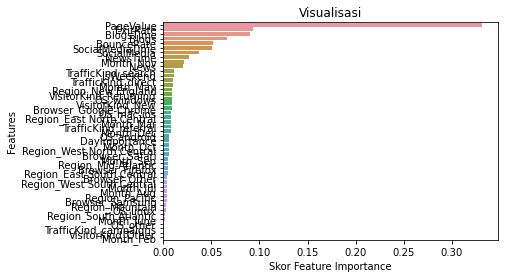

In [28]:
sns.barplot(x=features_scores, y = features_scores.index)

plt.xlabel('Skor Feature Importance')
plt.ylabel('Features')

plt.title("Visualisasi")

plt.show()

In [29]:
test_id = df2.UniqueId

In [30]:
submission_df = pd.DataFrame({"UniqueId":test_id, "IsSale":rf.predict(test_data)})

In [31]:
#Submission
submission_df.to_csv('submissions.csv',index=False)